<div style="text-align: center; color: Red; font-family: Arial;">
    <h2> California Real Estate </h2>
</div>

### NOTE : it was a task and removinf the nan is required if you will use the model note that 

## `01` Import libraries

In [44]:
# Essential Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Sklearn 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

### Load the data

In [18]:
data = pd.read_csv('California_Real_Estate.csv', sep=';')
df = data.copy()


## `02` EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Building          267 non-null    int64  
 1   Year of sale      195 non-null    float64
 2   Month of sale     195 non-null    float64
 3   Type of property  267 non-null    int64  
 4   Property #        207 non-null    float64
 5   Area (ft.)        267 non-null    int64  
 6   Price             267 non-null    int64  
 7   Status            267 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 16.8 KB


In [20]:
df.isnull().sum()/df.shape[0]

Building            0.000000
Year of sale        0.269663
Month of sale       0.269663
Type of property    0.000000
Property #          0.224719
Area (ft.)          0.000000
Price               0.000000
Status              0.000000
dtype: float64

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.describe()

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
count,267.000000,195.000000,195.000000,267.000000,207.000000,267.000000,267.000000,267.000000
mean,2.947566,2006.333333,7.271795,0.029963,26.024155,936.217228,281171.910112,0.730337
std,1.391794,1.072941,3.378674,0.170804,15.337763,284.893592,89119.087150,0.444618
min,1.000000,2004.000000,1.000000,0.000000,1.000000,411.000000,117564.000000,0.000000
25%,2.000000,2006.000000,4.000000,0.000000,13.000000,756.000000,217553.000000,0.000000
50%,3.000000,2007.000000,8.000000,0.000000,26.000000,798.000000,249076.000000,1.000000
75%,4.000000,2007.000000,10.000000,0.000000,38.500000,1122.000000,326964.500000,1.000000
max,5.000000,2010.000000,12.000000,1.000000,59.000000,1943.000000,538272.000000,1.000000


### Discard the NaN values

In [24]:
df_nulls = df[df.isnull()]
df_nonull = df.dropna()
df_nonull.isnull().sum()

Building            0
Year of sale        0
Month of sale       0
Type of property    0
Property #          0
Area (ft.)          0
Price               0
Status              0
dtype: int64

In [27]:
df_nonull.duplicated().sum()

np.int64(0)

In [30]:
df_nonull['Status'].unique()

array([1])

## `03` Visualization

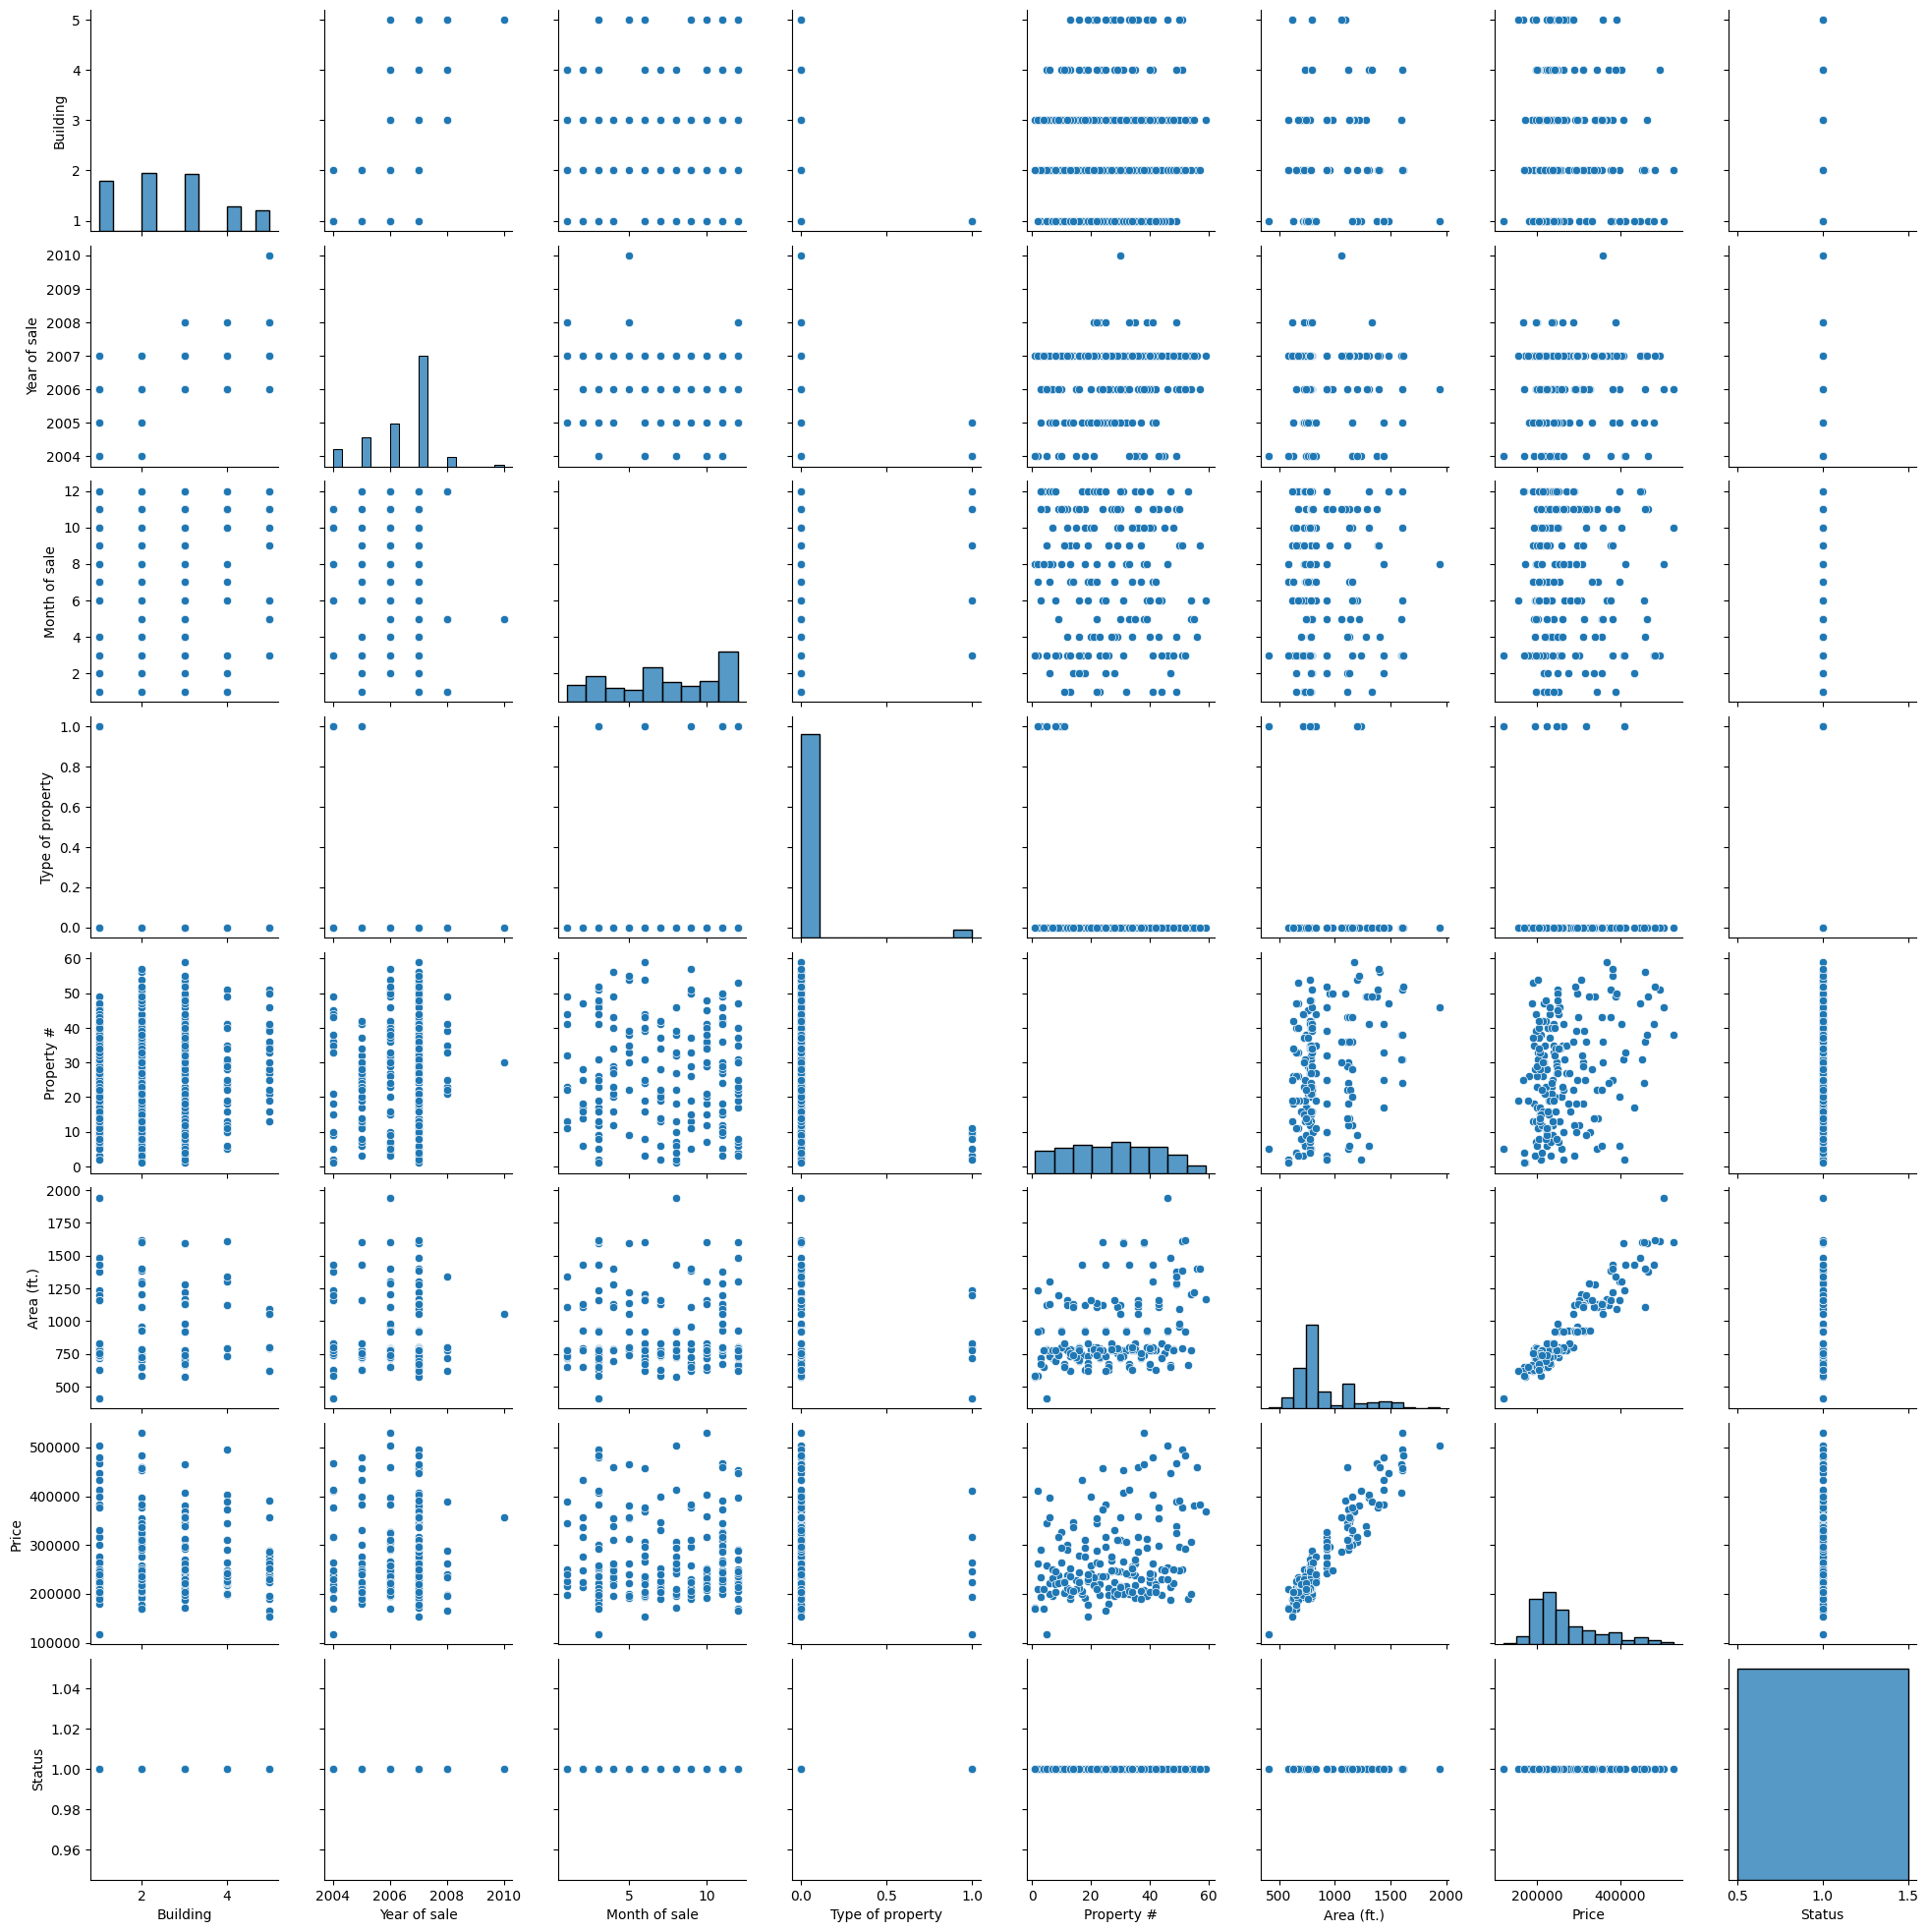

In [31]:
sns.pairplot(df_nonull)

In [32]:
# the correlation matrix with status 
corr = df_nonull.corr()
corr['Status'].sort_values(ascending=True)

# sns.heatmap(corr, annot=True)

Building           NaN
Year of sale       NaN
Month of sale      NaN
Type of property   NaN
Property #         NaN
Area (ft.)         NaN
Price              NaN
Status             NaN
Name: Status, dtype: float64

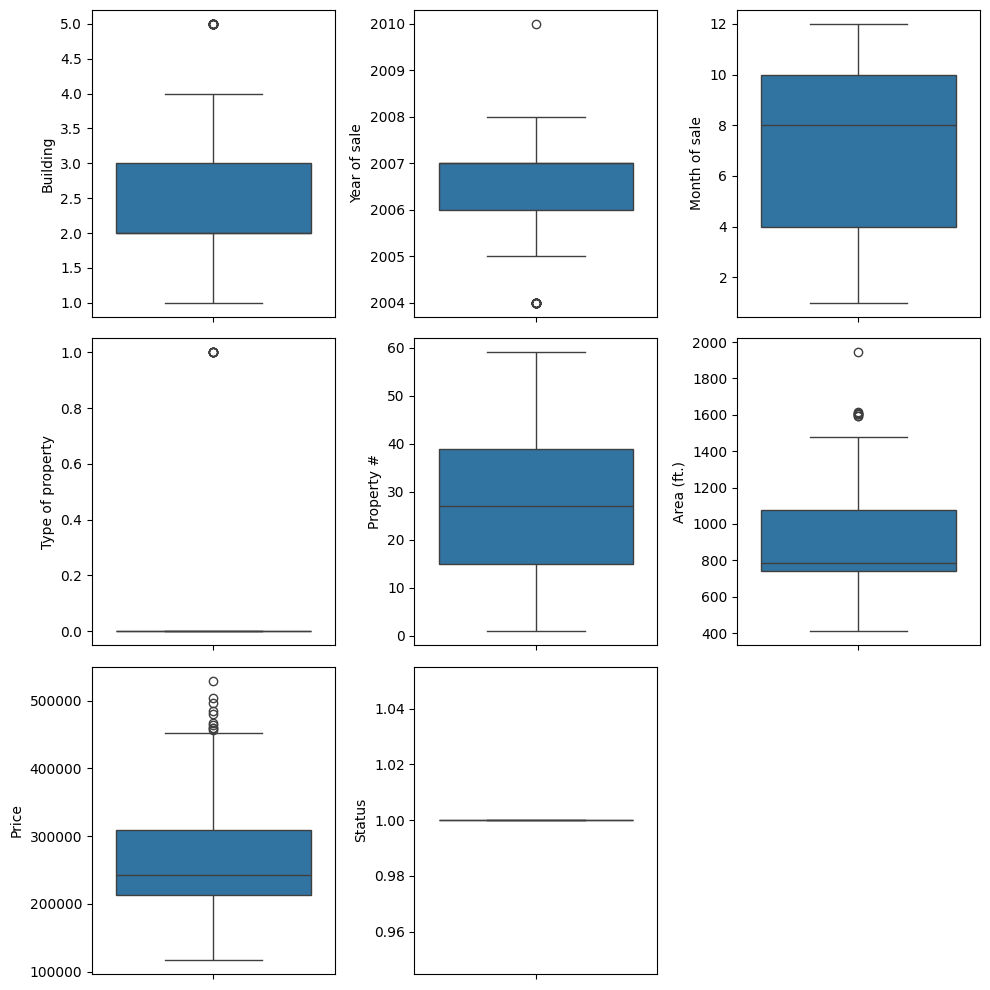

In [33]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df_nonull.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_nonull[col])
    plt.tight_layout()

## `04` Preprocessing

In [34]:
scalar = StandardScaler()

In [36]:
df_nonull_scaled = scalar.fit_transform(df_nonull)

## `05` Model

In [37]:
X = df_nonull.drop('Price', axis = 1)
y = df_nonull['Price']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
linear_model = LinearRegression()

In [40]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [41]:
predictions = linear_model.predict(x_test)

In [42]:
# Linear Model Evaluation
print('Linear Model Evaluation')
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2:', linear_model.score(x_test, y_test))


Linear Model Evaluation
MSE: 685724052.7697656
RMSE: 26186.333320451064
R2: 0.8785597180102009


In [46]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, predictions)))
print("Linear Regression Model Training Score: ",linear_model.score(x_train, y_train))
print("Linear Regression Model Testing Score: ",linear_model.score(x_test, y_test))

Linear Regression Model RMSE is:  26186.333320451064
Linear Regression Model Training Score:  0.8814146552289728
Linear Regression Model Testing Score:  0.8785597180102009


In [47]:
# Ridge Model
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [48]:
ridge_model.fit(x_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [49]:
predictions_Ridge = ridge_model.predict(x_test)

In [50]:
# Ridge Model Evaluation
print('Ridge Model Evaluation')
print('MSE:', mean_squared_error(y_test, predictions_Ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_Ridge)))
print('R2:', ridge_model.score(x_test, y_test))

Ridge Model Evaluation
MSE: 677630704.088422
RMSE: 26031.340804661253
R2: 0.8799930329743388


In [51]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, predictions_Ridge)))
print("Ridge Regression Model Training Score: ",ridge_model.score(x_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge_model.score(x_test, y_test))

Ridge Regression Model RMSE is:  26031.340804661253
Ridge Regression Model Training Score:  0.8813742600819688
Ridge Regression Model Testing Score:  0.8799930329743388


In [52]:
# Lasso Model
lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [53]:
lasso_model.fit(x_train, y_train)

LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [54]:
lasso_model.coef_ # No coeficients are zero so no feature selection -> no collinearity

array([-1048.92546236,  3510.88553358,  1054.17005627, -2630.30181573,
         180.43361882,   277.26454625,     0.        ])

In [55]:
predictions_Lasso = lasso_model.predict(x_test)

In [56]:
# Lasso Model Evaluation
print('Lasso Model Evaluation')
print('MSE:', mean_squared_error(y_test, predictions_Lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_Lasso)))
print('R2:', lasso_model.score(x_test, y_test))

Lasso Model Evaluation
MSE: 685053670.402663
RMSE: 26173.52995686029
R2: 0.8786784413120498


In [57]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, predictions_Lasso)))
print("Lasso Regression Model Training Score: ",lasso_model.score(x_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso_model.score(x_test, y_test))

Lasso Regression Model RMSE is:  26173.52995686029
Lasso Regression Model Training Score:  0.8814139776939297
Lasso Regression Model Testing Score:  0.8786784413120498


In [59]:
# comparing the models
print('Linear Model Evaluation')
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2:', linear_model.score(x_test, y_test))

print('\n\nRidge Model Evaluation')
print('MSE:', mean_squared_error(y_test, predictions_Ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_Ridge)))
print('R2:', ridge_model.score(x_test, y_test))

print('\n\nLasso Model Evaluation')
print('MSE:', mean_squared_error(y_test, predictions_Lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_Lasso)))
print('R2:', lasso_model.score(x_test, y_test))

Linear Model Evaluation
MSE: 685724052.7697656
RMSE: 26186.333320451064
R2: 0.8785597180102009


Ridge Model Evaluation
MSE: 677630704.088422
RMSE: 26031.340804661253
R2: 0.8799930329743388


Lasso Model Evaluation
MSE: 685053670.402663
RMSE: 26173.52995686029
R2: 0.8786784413120498
